In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os, sys

from pathlib import Path
sys.path.insert(0, str(Path.cwd().parent))
import leukopy_lib as leuko
from importlib import reload
reload(leuko)

<module 'leukopy_lib' from '/home/marie-anne/code/Leukopy/notebooks/leukopy_lib.py'>

In [8]:
path_name = '../../data/PBC_dataset_normal_df.csv'
path = Path(path_name)
df = pd.read_csv(path)
df.head()

,img_path,cell_type,label,label_2,label_3,height,width,mean_brightness,mean_luminance
0,../../data/PBC_dataset_normal_Barcelona/monocy...,monocyte,MO,MO,MO,363,360,196.225564,0.756902
1,../../data/PBC_dataset_normal_Barcelona/monocy...,monocyte,MO,MO,MO,363,360,196.672727,0.757366
2,../../data/PBC_dataset_normal_Barcelona/monocy...,monocyte,MO,MO,MO,363,360,204.348235,0.797640
3,../../data/PBC_dataset_normal_Barcelona/monocy...,monocyte,MO,MO,MO,363,360,199.038259,0.770929
4,../../data/PBC_dataset_normal_Barcelona/monocy...,monocyte,MO,MO,MO,363,360,191.020018,0.734784


Type de img :  <class 'numpy.ndarray'>
Shape de img :  (363, 360, 3)


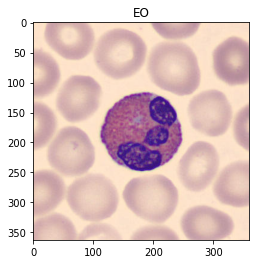

In [9]:
###### Afficher une image au hasard ######
i = np.random.randint(0,len(df))
img = plt.imread(df.loc[i,"img_path"])

# Caractéristiques de l'image :
# Images RGB : (M,N,3)   M*N pixels, 3 canaux (rouge, vert, bleu)
print("Type de img : ",type(img))
print("Shape de img : ",img.shape)

pix_height = img.shape[0]
pix_width = img.shape[1]

fig0 = plt.figure()
plt.imshow(img)
plt.title(df.loc[i,"label"])
plt.show()

In [10]:
print(df["height"].value_counts().sort_index())
print("--------------------------------------")
print(df["width"].value_counts().sort_index())
print("--------------------------------------")

# Quelques surprises au niveau de la taille des images... On rabote ?
pix_height = min(df["height"])
pix_width = min(df["width"])
print("Min Height : %i ; Min Width : %i"%(min(df["height"]),min(df["width"])))
print("--------------------------------------")

# Utile pour plus loin (cf. cellules "moyennes")
pix_height = min(pix_height,pix_width)
pix_width = pix_height

print("Min Height : %i ; Min Width : %i"%(pix_width, pix_height))

360       52
363    16639
369      250
Name: height, dtype: int64
--------------------------------------
360    16690
362        1
366      250
Name: width, dtype: int64
--------------------------------------
Min Height : 360 ; Min Width : 360
--------------------------------------
Min Height : 360 ; Min Width : 360


Text(0, 0.5, 'Number of images')

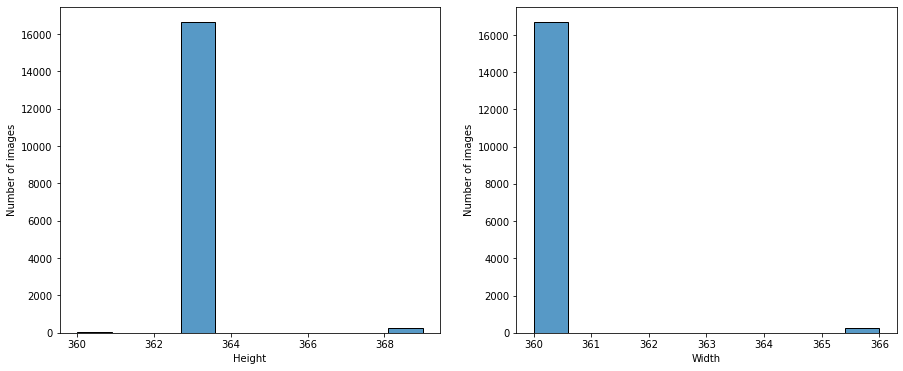

In [11]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.histplot(x = "height", bins = 10, data = df)
plt.xlabel('Height')
plt.ylabel('Number of images')

plt.subplot(1,2,2)
sns.histplot(x = "width", bins = 10, data = df)
plt.xlabel('Width')
plt.ylabel('Number of images')

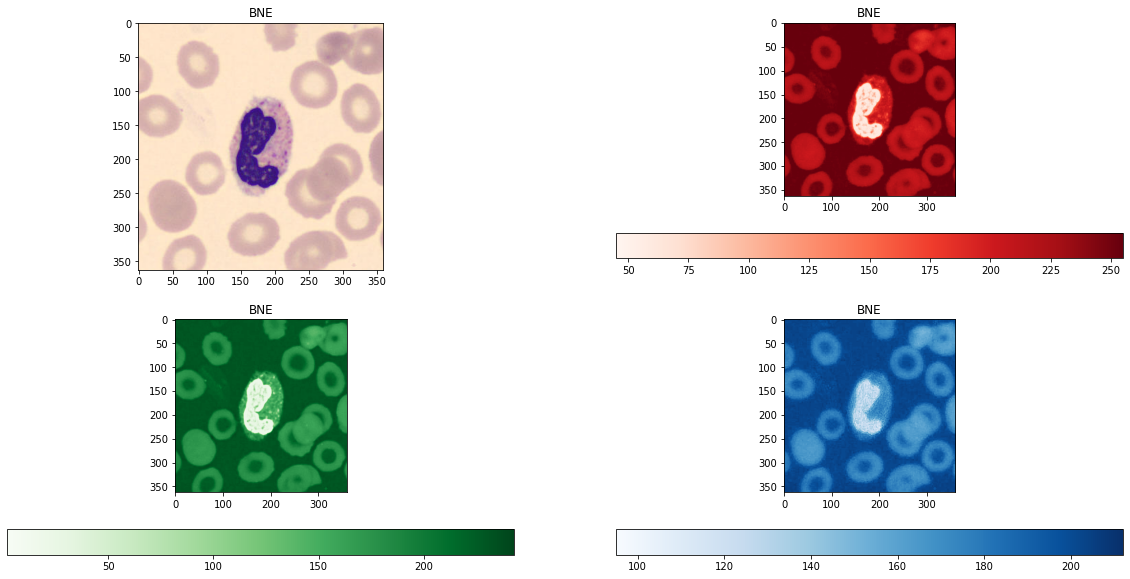

In [13]:
###### Décomposition en trois canaux ######

i = np.random.randint(0,len(df))
img = plt.imread(df.loc[i,"img_path"])

#img = plt.imread('afqqm.jpg')  ## TEST validité décomposition RGB

fig4 = plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
plt.imshow(img)
plt.title(df.loc[i,"label"])

colors = ['Reds','Greens','Blues']
for j in range(3):
    canal = img[:,:,j]
    plt.subplot(2,2,j+2)
    plt.imshow(canal, cmap = colors[j])
    plt.title(df.loc[i,"label"])
    plt.colorbar(orientation = "horizontal")

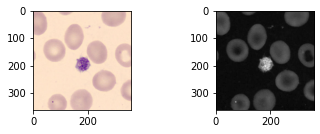

In [14]:
###### Analyse de la luminosité, classe par classe ###### 
## Certaines cellules ont une teinte différente par rapport aux autres (cf. éosinophiles) : dans ce cas une
## différence de teinte n'est pas un biais mais un possible critère de sélection...

## Passage en noir et blanc pour vérifier s'il y a différence de luminosité entre chaque catégorie de cellule.

i = np.random.randint(0,len(df))
img = plt.imread(df.loc[i,"img_path"])
img_grey = img.mean(axis = 2)                 # On moyenne sur les 3 canaux pour avoir les niveaux de gris

fig6 = plt.figure()
fig6.add_subplot(2,2,1)
plt.imshow(img)

fig6.add_subplot(2,2,2)
plt.imshow(img_grey, cmap = 'binary')

#fig6.add_subplot(2,2,3)

#fig6.add_subplot(2,2,4)

# Le noyau de la cellule d'intérêt vire au blanc : peut-être une piste pour se débarrasser des globules rouges en fond.

<AxesSubplot:xlabel='mean_brightness', ylabel='Density'>

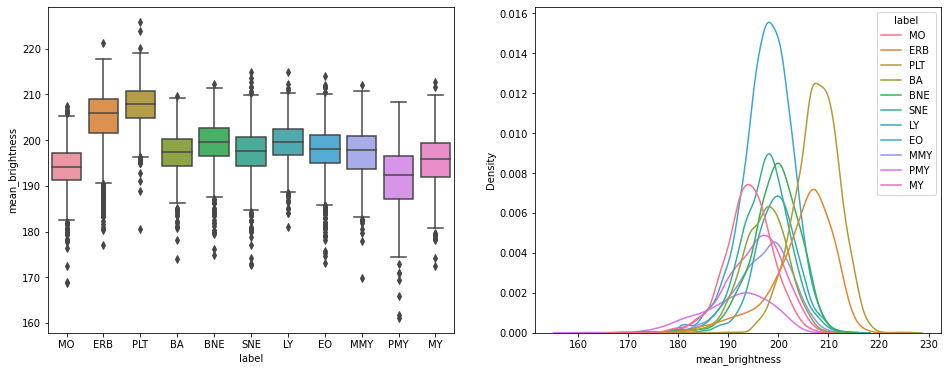

In [16]:
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
sns.boxplot(x = "label", y = "mean_brightness", data = df)

plt.subplot(1,2,2)
sns.kdeplot(x = "mean_brightness", hue = "label", data = df)

# Biais de luminosité moyenne pour ERB (erythroblastes), PLATELET (plaquettes), MO (monocytes, en moindre mesure)
# Outliers (faible luminosité) dans toutes les classes.

<AxesSubplot:xlabel='mean_brightness', ylabel='Density'>

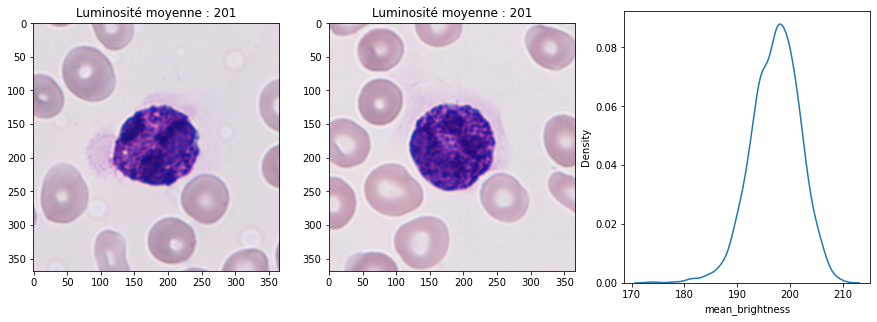

In [35]:
fig = plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.imshow(plt.imread(df[df["img_path"].str.contains('BA_4744')]['img_path'].item()))
plt.title("Luminosité moyenne : %i"%(df[df["img_path"].str.contains('BA_4744')]["mean_brightness"]))

plt.subplot(1,3,2)
plt.imshow(plt.imread(df[df["img_path"].str.contains('BA_6162')]['img_path'].item()))
plt.title("Luminosité moyenne : %i"%(df[df["img_path"].str.contains('BA_6162')]["mean_brightness"]))

plt.subplot(1,3,3)
sns.kdeplot(x = "mean_brightness", data = df[df["label"] == "BA"])

## Les images dont le fond est plutôt violet/gris ne sont forcément pas des outliers et correspondent à des
## luminosités plutôt élevées.

## Si on regarde la kde des basophiles (3e figure ci-dessous), on voit 2 pics pratiquement confondus... 
## Le pic de luminosité "élevée" semble correspondre aux images au fond violet ~ gris.

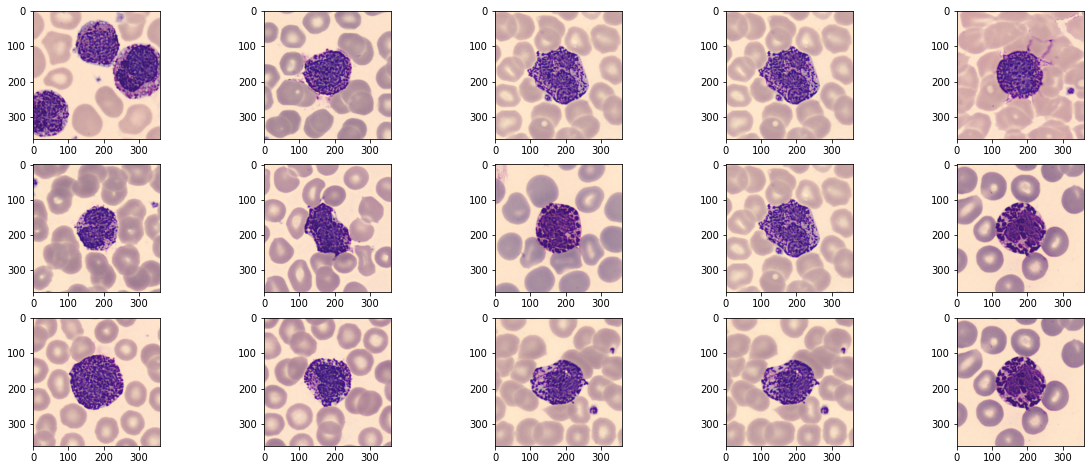

In [37]:
# On peut afficher les images de quelques outliers chez les basophiles (BA)

import random

df_sombre_BA = df[(df["mean_brightness"] <= 185) & (df["label"] == "BA")]
images_BA = random.choices(df_sombre_BA.index, k = 15)

plt.figure(figsize = (20,8))

for i, f_BA in zip(range(15), images_BA):
 
    img_BA = plt.imread(df.loc[f_BA,"img_path"])
    
    plt.subplot(3,5,i+1)
    plt.imshow(img_BA)
    
## Les outliers de faible luminosité sont des images pour lesquelles il y a plusieurs basophiles, ou beaucoup de
## globules rouges.

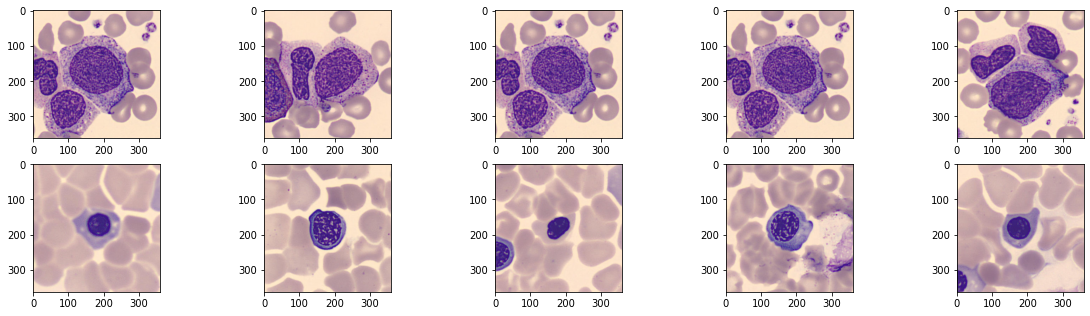

In [39]:
# On affiche des outliers dans d'autres classes de cellules : IG, ERB

df_sombre_IG = df[(df["mean_brightness"] <= 170) & (df["label_2"] == "IG")]
df_sombre_ERB = df[(df["mean_brightness"] <= 185) & (df["label_2"]== "ERB")]

images_IG = random.choices(df_sombre_IG.index, k = 5)
images_ERB = random.choices(df_sombre_ERB.index, k = 5)

plt.figure(figsize = (20,8))

for i, f_IG, f_ERB in zip(range(5), images_IG, images_ERB):
 
    img_IG = plt.imread(df.loc[f_IG,"img_path"])
    img_ERB = plt.imread(df.loc[f_ERB,"img_path"])
    
    plt.subplot(3,5,i+1)
    plt.imshow(img_IG)
    
    plt.subplot(3,5,i+6)
    plt.imshow(img_ERB)
    
# Plusieurs raisons pour les outliers en luminosité :
# - plusieurs cellules d'intérêt (couleur vive) dans l'image
# - beaucoup de globules rouges sur l'image

In [40]:
#print(df.groupby("label")["mean_brightness"].describe())

brightness = pd.DataFrame(df.groupby(by = "label")["mean_brightness"].mean())
brightness["class_std"] = df.groupby(by = "label")["mean_brightness"].std()

brightness = brightness.rename({"mean_brightness":"class_mean"}, axis = 1)
brightness

,class_mean,class_std
label,,
BA,197.216984,4.543105
BNE,199.352726,4.854124
EO,197.760774,4.978062
ERB,204.655257,6.353223
LY,199.571812,4.292060
MMY,197.096193,5.423425
MO,194.063900,4.823247
MY,195.460265,5.536534
PLT,207.697901,4.397455


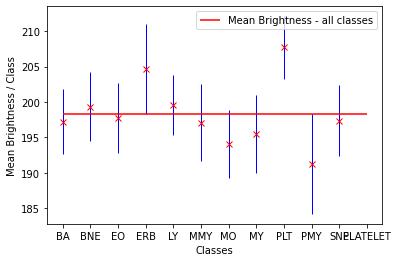

In [41]:
# Moyenne de la luminosité pour chaque classe de cellules + barres d'erreur

plt.errorbar(x = brightness.index, y = brightness["class_mean"], yerr = brightness["class_std"],
             marker = 'x', elinewidth = 1, linewidth = 0, ecolor = 'blue', color = 'red')

plt.hlines(y = brightness["class_mean"].mean(), xmin = 'BA', xmax = 'PLATELET', 
           color = "red", label = 'Mean Brightness - all classes')
plt.xlabel('Classes')
plt.ylabel('Mean Brightness / Class')
plt.legend()
plt.show()

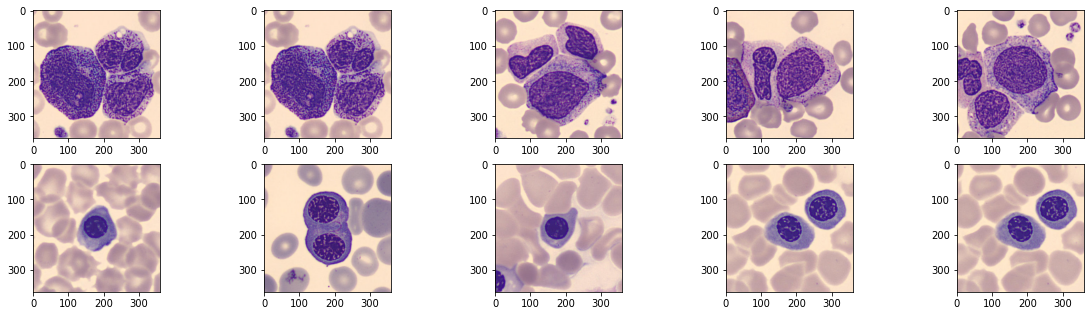

In [43]:
import random

df_sombre_IG = df[(df["mean_brightness"] <= 170) & (df["label_2"] == "IG")]
df_sombre_ERB = df[(df["mean_brightness"] <= 185) & (df["label_2"]== "ERB")]

images_IG = random.choices(df_sombre_IG.index, k = 5)
images_ERB = random.choices(df_sombre_ERB.index, k = 5)

plt.figure(figsize = (20,8))

for i, f_IG, f_ERB in zip(range(5), images_IG, images_ERB):
 
    img_IG = plt.imread(df.loc[f_IG,"img_path"])
    img_ERB = plt.imread(df.loc[f_ERB,"img_path"])
    
    plt.subplot(3,5,i+1)
    plt.imshow(img_IG)
    
    plt.subplot(3,5,i+6)
    plt.imshow(img_ERB)
    
# Plusieurs raisons pour les outliers en luminosité :
# - plusieurs cellules d'intérêt (couleur vive) dans l'image
# - beaucoup de globules rouges sur l'image

In [44]:
#print(df.groupby("label")["mean_brightness"].describe())

brightness = pd.DataFrame(df.groupby(by = "label")["mean_brightness"].mean())
brightness["class_std"] = df.groupby(by = "label")["mean_brightness"].std()

brightness = brightness.rename({"mean_brightness":"class_mean"}, axis = 1)
brightness

,class_mean,class_std
label,,
BA,197.216984,4.543105
BNE,199.352726,4.854124
EO,197.760774,4.978062
ERB,204.655257,6.353223
LY,199.571812,4.292060
MMY,197.096193,5.423425
MO,194.063900,4.823247
MY,195.460265,5.536534
PLT,207.697901,4.397455


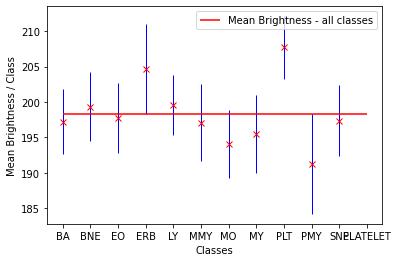

In [45]:
## Moyenne de la luminosité pour chaque classe de cellules + barres d'erreur

plt.errorbar(x = brightness.index, y = brightness["class_mean"], yerr = brightness["class_std"],
             marker = 'x', elinewidth = 1, linewidth = 0, ecolor = 'blue', color = 'red')

plt.hlines(y = brightness["class_mean"].mean(), xmin = 'BA', xmax = 'PLATELET', 
           color = "red", label = 'Mean Brightness - all classes')
plt.xlabel('Classes')
plt.ylabel('Mean Brightness / Class')
plt.legend()
plt.show()